In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import PIL

In [12]:
DATA_PATH = '../data/NAPLab-LiDAR'
LABEL_PATH = f'{DATA_PATH}/labels_yolo_v1.1/'

In [60]:
with open(f'{DATA_PATH}/names.txt', 'r') as f:
    classes = f.read().split('\n')
    classes.remove('')

with open(f'{DATA_PATH}/train.txt', 'r') as f:
    train_files = f.read().split('\n')

In [73]:
classes_to_number = {class_: i for i, class_ in enumerate(classes)}
classes_to_number

{'car': 0,
 'truck': 1,
 'bus': 2,
 'motorcycle': 3,
 'bicycle': 4,
 'scooter': 5,
 'person': 6,
 'rider': 7}

In [74]:
number_to_classes = {i: class_ for i, class_ in enumerate(classes)}
number_to_classes

{0: 'car',
 1: 'truck',
 2: 'bus',
 3: 'motorcycle',
 4: 'bicycle',
 5: 'scooter',
 6: 'person',
 7: 'rider'}

In [17]:
img = PIL.Image.open(f'{DATA_PATH}/{train_files[0]}')

In [25]:
def read_label(image_path):
    label_path = f'{LABEL_PATH}{image_path.split("/")[-1].replace(".PNG", ".txt")}'
    with open(label_path, 'r') as f:
        labels = f.read().split('\n')
        labels.remove('')
    return labels

In [47]:
labels = read_label(train_files[0])
labels

['0 0.443262 0.734805 0.037695 0.228984',
 '0 0.461006 0.683984 0.025137 0.139062',
 '0 0.537803 0.637188 0.014941 0.089688',
 '6 0.485371 0.793633 0.011367 0.412734',
 '6 0.147124 0.739062 0.003428 0.114063',
 '6 0.150674 0.742070 0.003672 0.110703',
 '5 0.300137 0.864258 0.013125 0.271484',
 '5 0.312466 0.864141 0.012627 0.271719',
 '4 0.591631 0.715430 0.012598 0.139922']

In [86]:
def get_absolute_coords(label: str, img: PIL.Image.Image) -> tuple:
    """
    Get the absolute coordinates of the bounding box
    :param label: string with elements 'class x y w h' where x, y are the center of the rectangle
    :param img: PIL.Image object
    :return: list with elements [class_, x, y, w, h] where x, y are the top left corner of the rectangle
    """
    label = label.split(' ')
    class_ = int(label[0])
    # scaling all values to the image size
    x = float(label[1]) * img.size[0]   # this is the center of the rectangle
    y = float(label[2]) * img.size[1]   # this is the center of the rectangle
    w = float(label[3]) * img.size[0]
    h = float(label[4]) * img.size[1]
    
    # getting the top left corner
    x = x - w/2
    y = y - h/2
    return class_, x, y, w, h

In [87]:
class_, x, y, w, h = get_absolute_coords(labels[0], img)

In [88]:
color_class_dict = {class_: sns.color_palette('hls', len(classes))[i] for i, class_ in enumerate(classes)}
color_class_dict

{'car': (0.86, 0.3712, 0.33999999999999997),
 'truck': (0.86, 0.7612000000000001, 0.33999999999999997),
 'bus': (0.5688000000000001, 0.86, 0.33999999999999997),
 'motorcycle': (0.33999999999999997, 0.86, 0.5012000000000001),
 'bicycle': (0.33999999999999997, 0.8287999999999999, 0.86),
 'scooter': (0.33999999999999997, 0.43879999999999986, 0.86),
 'person': (0.6311999999999998, 0.33999999999999997, 0.86),
 'rider': (0.86, 0.33999999999999997, 0.6987999999999996)}

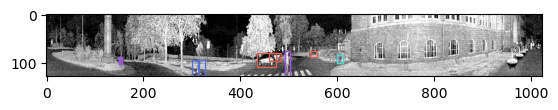

In [91]:
imgplot = plt.imshow(img)
for label in labels:
    class_, x, y, w, h = get_absolute_coords(label, img)
    class_ = number_to_classes[class_]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor=color_class_dict[class_], facecolor='none')
    plt.gca().add_patch(rect)
plt.savefig('example.png')
plt.show()
